In [2]:
import numpy as np
import pandas as pd
import os
# set scripts to path
import sys
sys.path.append(os.path.abspath('scripts'))
import matplotlib.pyplot as plt
from extract import ExtractData 
from extract import ExtractData 
from inp_file import CreateInputFile

In [3]:
ed = ExtractData()

In [4]:
input_file = '/home/shailja/softwares/NMSSMTools_6.0.0/code/variation_of_higgs_mass/inpZ3_P1.dat'

# changing the current working directory to NMSSMTools_6.0.0 for running the code of NMSSMTools
os.chdir("/home/shailja/softwares/NMSSMTools_6.0.0/")

output_file="/home/shailja/softwares/NMSSMTools_6.0.0/code/variation_of_higgs_mass/spectrZ3_P1.dat"

# Single run

In [14]:
os.system(f"./run {input_file}")

Running NMHDECAY for 1 point
with input file /home/shailja/softwares/NMSSMTools_6.0.0/code/variation_of_higgs_mass/inpZ3_P1.dat
DM relic density will be computed by micrOMEGAs
Output files spectrZ3_P1.dat and omegaZ3_P1.dat
will be written in directory /home/shailja/softwares/NMSSMTools_6.0.0/code/variation_of_higgs_mass
OK!


0

In [15]:
ed.extract_mixing(output_file, block_name='BLOCK NMNMIX  # 5*5 Neutralino Mixing Matrix', mixing="# Gaugino-Higgsino mixing",
                    col=['lambda_1', 'lambda_2_3', 'psi_d', 'psi_u', 'psi_S'], 
                    row=['Chi_1_0', 'Chi_2_0', 'Chi_3_0', 'Chi_4_0', 'Chi_5_0'])

,lambda_1,lambda_2_3,psi_d,psi_u,psi_S
Chi_1_0,0.322710,0.190963,13.284371,29.906080,56.295876
Chi_2_0,0.116305,0.105417,48.926983,47.977179,2.874117
Chi_3_0,0.367653,0.185956,37.632060,20.984697,40.829634
Chi_4_0,99.191264,0.011630,0.116236,0.680506,0.000365
Chi_5_0,0.002068,99.506034,0.040352,0.451538,0.000009


In [16]:
ed.extract_mixing(output_file, block_name='BLOCK UMIX  # Chargino U Mixing Matrix', mixing="# ",
                    col=['lambda(-)', 'psi_d(-)'], 
                    row=['Chi_1(-)', 'Chi_2(-)'])

,lambda(-),psi_d(-)
Chi_1(-),0.080116,99.919884
Chi_2(-),99.919884,0.080116


# Variation of Gluino Mass

In [4]:
def run_loop(input_file, param_values, parameter):
    gluino_mass = []
    for parm_value in param_values:
        ed.change_parameters(input_file=input_file, parameter=parameter, value=parm_value)
        os.system(f"./run {input_file}")
        mass = ed.extract_mass_spectrum(output_file)
        if len(mass) ==0:
            gluino_mass.append(np.nan)
        else:
            gluino_mass.append(mass[mass["Particle Name"] == "~g"]["Mass"].values[0])

    return gluino_mass

## w.r.t $\lambda$

In [ ]:
lambda_ = np.linspace(0.001, 2, 30)
gluino_ = run_loop(input_file, lambda_, "LAMBDA")  # for tan_beta = 5

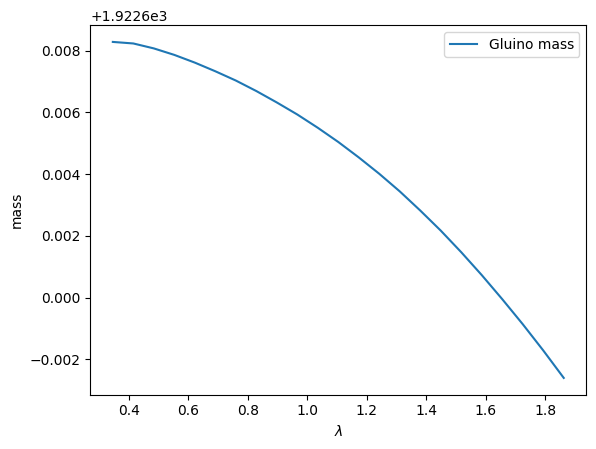

In [6]:
plt.plot(lambda_, gluino_, label="Gluino mass")
plt.xlabel(f"$\lambda$")
plt.ylabel("mass")
plt.legend();

## w.r.t $tan(\beta)$

In [12]:
tan_beta = np.linspace(2, 6, 30)
gluino_ = run_loop(input_file, tan_beta, "TANB at MZ")   # for lambda = 0.285

Running NMHDECAY for 1 point
with input file /home/shailja/softwares/NMSSMTools_6.0.0/code/variation_of_higgs_mass/inpZ3_P1.dat
DM relic density will be computed by micrOMEGAs
Output files spectrZ3_P1.dat and omegaZ3_P1.dat
will be written in directory /home/shailja/softwares/NMSSMTools_6.0.0/code/variation_of_higgs_mass
OK!
Running NMHDECAY for 1 point
with input file /home/shailja/softwares/NMSSMTools_6.0.0/code/variation_of_higgs_mass/inpZ3_P1.dat
DM relic density will be computed by micrOMEGAs
Output files spectrZ3_P1.dat and omegaZ3_P1.dat
will be written in directory /home/shailja/softwares/NMSSMTools_6.0.0/code/variation_of_higgs_mass
OK!
Running NMHDECAY for 1 point
with input file /home/shailja/softwares/NMSSMTools_6.0.0/code/variation_of_higgs_mass/inpZ3_P1.dat
DM relic density will be computed by micrOMEGAs
Output files spectrZ3_P1.dat and omegaZ3_P1.dat
will be written in directory /home/shailja/softwares/NMSSMTools_6.0.0/code/variation_of_higgs_mass
OK!
Running NMHDECAY fo

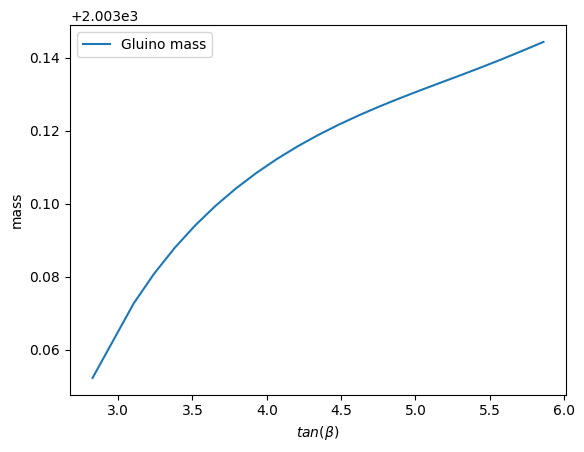

In [13]:
plt.plot(tan_beta, gluino_, label="Gluino mass")
plt.xlabel(f"$tan(\\beta)$")
plt.ylabel("mass")
plt.legend();

# Variation of Higgs mass

***

### w.r.t A_lmabda

In [ ]:
create = CreateInputFile()

h1_0 = []
h2_0 = []
a1_0 = []

A_lambdas_ = np.linspace(600, 1200, 30)
for A_lambda_ in A_lambdas_:
    create.ALAMBDA = A_lambda_

    create.save_input_file(input_file)

    os.system(f"./run {input_file}")

    mass = ed.extract_mass_spectrum(output_file)

    # check if we got the output or not
    if len(mass) ==0:
        h1_0.append(-1)
        h2_0.append(-1)
        a1_0.append(-1)
    else:
        h1_0.append(mass[mass["Particle Name"] == "lightest neutral scalar"]["Mass"].values[0])
        h2_0.append(mass[mass["Particle Name"] == "second neutral scalar"]["Mass"].values[0])
        a1_0.append(mass[mass["Particle Name"] == "lightest pseudoscalar"]["Mass"].values[0])

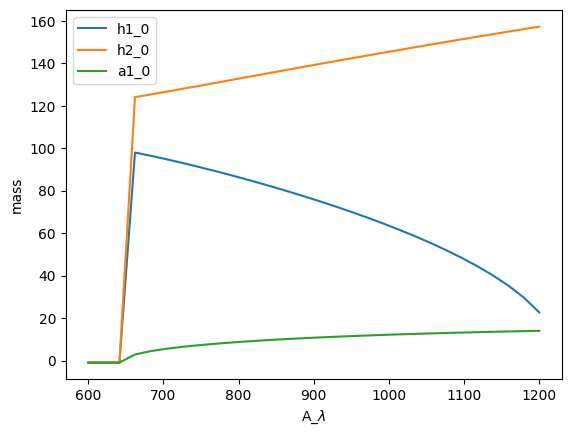

In [18]:
plt.plot(A_lambdas_, h1_0 ,label="h1_0")
plt.plot(A_lambdas_, h2_0 ,label="h2_0")
plt.plot(A_lambdas_, a1_0 ,label="a1_0")
plt.xlabel(f"A_$\lambda$")
plt.ylabel("mass")
plt.legend();

## w.r.t $A_\kappa$

In [7]:
create = CreateInputFile()

h1_0 = []
h2_0 = []
a1_0 = []

A_kappas_ = np.linspace(4, 14, 30)
for A_kappa_ in A_kappas_:
    create.AKAPPA = A_kappa_

    create.save_input_file(input_file)

    os.system(f"./run {input_file}")

    mass = ed.extract_mass_spectrum(output_file)

    # check if we got the output or not
    if len(mass) ==0:
        h1_0.append(-1)
        h2_0.append(-1)
        a1_0.append(-1)
    else:
        h1_0.append(mass[mass["Particle Name"] == "lightest neutral scalar"]["Mass"].values[0])
        h2_0.append(mass[mass["Particle Name"] == "second neutral scalar"]["Mass"].values[0])
        a1_0.append(mass[mass["Particle Name"] == "lightest pseudoscalar"]["Mass"].values[0])

Running NMHDECAY for 1 point
with input file /home/shailja/softwares/NMSSMTools_6.0.0/code/variation_of_higgs_mass/inpZ3_P1.dat
DM relic density will be computed by micrOMEGAs
Output files spectrZ3_P1.dat and omegaZ3_P1.dat
will be written in directory /home/shailja/softwares/NMSSMTools_6.0.0/code/variation_of_higgs_mass
OK!
Running NMHDECAY for 1 point
with input file /home/shailja/softwares/NMSSMTools_6.0.0/code/variation_of_higgs_mass/inpZ3_P1.dat
DM relic density will be computed by micrOMEGAs
Output files spectrZ3_P1.dat and omegaZ3_P1.dat
will be written in directory /home/shailja/softwares/NMSSMTools_6.0.0/code/variation_of_higgs_mass
OK!
Running NMHDECAY for 1 point
with input file /home/shailja/softwares/NMSSMTools_6.0.0/code/variation_of_higgs_mass/inpZ3_P1.dat
DM relic density will be computed by micrOMEGAs
Output files spectrZ3_P1.dat and omegaZ3_P1.dat
will be written in directory /home/shailja/softwares/NMSSMTools_6.0.0/code/variation_of_higgs_mass
OK!
Running NMHDECAY fo

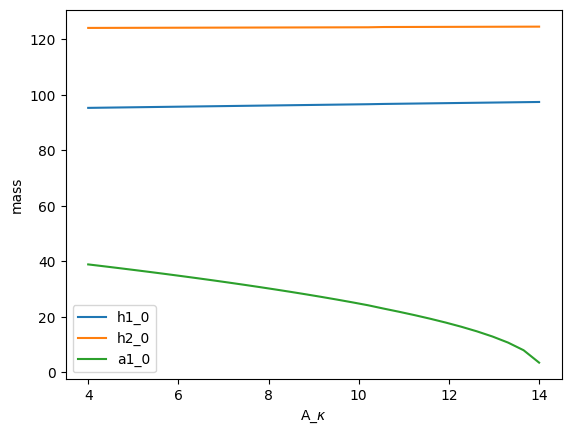

In [9]:
plt.plot(A_kappas_, h1_0 ,label="h1_0")
plt.plot(A_kappas_, h2_0 ,label="h2_0")
plt.plot(A_kappas_, a1_0 ,label="a1_0")
plt.xlabel(f"A_$\kappa$")
plt.ylabel("mass")
plt.legend();

***

In [11]:
def run_loop(input_file, param_values, parameter):
    h1_0 = []
    h2_0 = []
    a1_0 = []
    for parm_value in param_values:
        ed.change_parameters(input_file=input_file, parameter=parameter, value=parm_value)
        os.system(f"./run {input_file}")
        mass = ed.extract_mass_spectrum(output_file)
        if len(mass) ==0:
            h1_0.append(-1)
            h2_0.append(-1)
            a1_0.append(-1)
        else:
            h1_0.append(mass[mass["Particle Name"] == "lightest neutral scalar"]["Mass"].values[0])
            h2_0.append(mass[mass["Particle Name"] == "second neutral scalar"]["Mass"].values[0])
            a1_0.append(mass[mass["Particle Name"] == "lightest pseudoscalar"]["Mass"].values[0])

    return h1_0, h2_0, a1_0

## w.r.t. the $\lambda$ parameter,
 
at $\kappa$ = 0.1165 and $\tan(\beta)$ = 5

In [14]:
lambda_ = np.linspace(0.2, 0.7, 20)
h1_0, h2_0, a1_0 = run_loop(input_file, lambda_, "LAMBDA")  # for tan_beta = 5

Running NMHDECAY for 1 point
with input file /home/shailja/softwares/NMSSMTools_6.0.0/code/variation_of_higgs_mass/inpZ3_P1.dat
DM relic density will be computed by micrOMEGAs
Output files spectrZ3_P1.dat and omegaZ3_P1.dat
will be written in directory /home/shailja/softwares/NMSSMTools_6.0.0/code/variation_of_higgs_mass
OK!
Running NMHDECAY for 1 point
with input file /home/shailja/softwares/NMSSMTools_6.0.0/code/variation_of_higgs_mass/inpZ3_P1.dat
DM relic density will be computed by micrOMEGAs
Output files spectrZ3_P1.dat and omegaZ3_P1.dat
will be written in directory /home/shailja/softwares/NMSSMTools_6.0.0/code/variation_of_higgs_mass
OK!
Running NMHDECAY for 1 point
with input file /home/shailja/softwares/NMSSMTools_6.0.0/code/variation_of_higgs_mass/inpZ3_P1.dat
DM relic density will be computed by micrOMEGAs
Output files spectrZ3_P1.dat and omegaZ3_P1.dat
will be written in directory /home/shailja/softwares/NMSSMTools_6.0.0/code/variation_of_higgs_mass
OK!
Running NMHDECAY fo

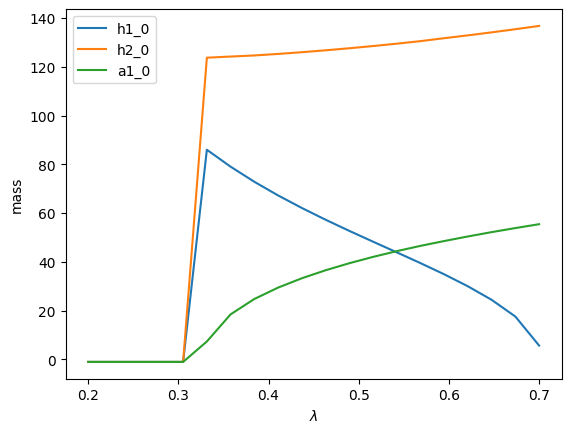

In [15]:
plt.plot(lambda_, h1_0 ,label="h1_0")
plt.plot(lambda_, h2_0 ,label="h2_0")
plt.plot(lambda_, a1_0 ,label="a1_0")
plt.xlabel(f"$\lambda$")
plt.ylabel("mass")
plt.legend();

## w.r.t $A_\kappa$

In [24]:
akappa = np.linspace(2, 6, 30)
h1_0, h2_0, a1_0 = run_loop(input_file, akappa, "AKAPPA (If KAPPA =/=0 and XIS+MP are not inputs)")  


Running NMHDECAY for 1 point
with input file /home/shailja/softwares/NMSSMTools_6.0.0/code/variation_of_higgs_mass/inpZ3_P1.dat
DM relic density will be computed by micrOMEGAs
Output files spectrZ3_P1.dat and omegaZ3_P1.dat
will be written in directory /home/shailja/softwares/NMSSMTools_6.0.0/code/variation_of_higgs_mass
OK!
Running NMHDECAY for 1 point
with input file /home/shailja/softwares/NMSSMTools_6.0.0/code/variation_of_higgs_mass/inpZ3_P1.dat
DM relic density will be computed by micrOMEGAs
Output files spectrZ3_P1.dat and omegaZ3_P1.dat
will be written in directory /home/shailja/softwares/NMSSMTools_6.0.0/code/variation_of_higgs_mass
OK!
Running NMHDECAY for 1 point
with input file /home/shailja/softwares/NMSSMTools_6.0.0/code/variation_of_higgs_mass/inpZ3_P1.dat
DM relic density will be computed by micrOMEGAs
Output files spectrZ3_P1.dat and omegaZ3_P1.dat
will be written in directory /home/shailja/softwares/NMSSMTools_6.0.0/code/variation_of_higgs_mass
OK!
Running NMHDECAY fo

## w.r.t. the $tan(\beta)$ parameter,

at $\kappa$ = 0.1165 and $\lambda$ = 0.285

In [ ]:
tan_beta = np.linspace(2, 6, 30)
h1_0, h2_0, a1_0 = run_loop(input_file, tan_beta, "TANB at MZ")   # for lambda = 0.285

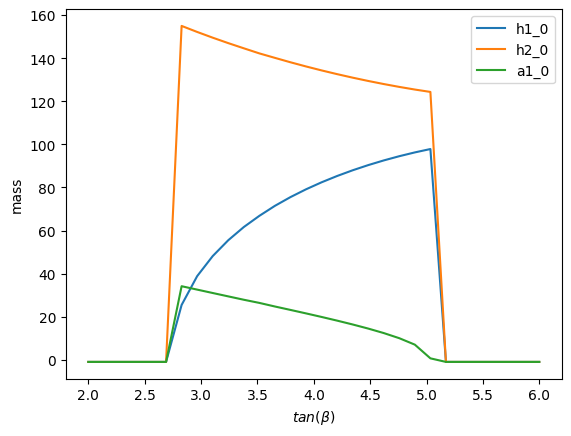

In [12]:
plt.plot(tan_beta, h1_0 ,label="h1_0")
plt.plot(tan_beta, h2_0 ,label="h2_0")
plt.plot(tan_beta, a1_0 ,label="a1_0")
plt.xlabel(f"$tan(\\beta)$")
plt.ylabel("mass")
plt.legend();

## w.r.t. the $\kappa$ parameter,

at $\lambda$ = 0.285 and $\tan(\beta)$ = 5

In [ ]:
kappa = np.linspace(0, 0.2, 30)
h1_0, h2_0, a1_0 = run_loop(input_file, kappa, "KAPPA (If =/= 0)")   # for lambda = 0.285, tan_beta = 5

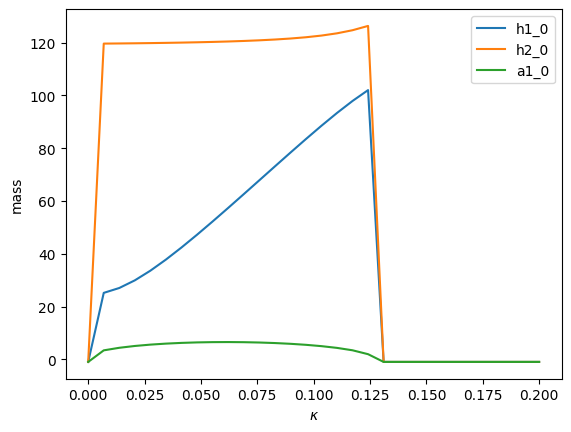

In [14]:
plt.plot(kappa, h1_0,label="h1_0")
plt.plot(kappa, h2_0,label="h2_0")
plt.plot(kappa, a1_0,label="a1_0")
plt.xlabel(f"$\kappa$")
plt.ylabel("mass")
plt.legend();